### 五次多项式曲线插值法轨迹规划


<center><img src="https://img-blog.csdnimg.cn/3f4a7ba9ed7042fbab92a5a797361af9.png" width=40%>

![在这里插入图片描述](https://img-blog.csdnimg.cn/5f92a5b2e03f4574aff9cf3b59bfc3f5.png)

In [129]:
import numpy as np
import matplotlib.pyplot as plt


### 初始参数设置

In [130]:
# 场景定义
# 换道场景路段与车辆相关参数的定义
d = 3.5          # 道路标准宽度
len_line = 30    # 直线段长度
W = 1.75         # 车宽
L = 4.7          # 车长

# 车辆换道初始状态与终点期望状态
t0 = 0
t1 = 3
state_t0 = np.array([0, -d/2, 5, 0, 0, 0])  # 分别表示小车的x,y; vx,vy; ax,ay
state_t1 = np.array([20, d/2, 5, 0, 0, 0])


### 五次多项式轨迹生成

计算A和B两个系数矩阵

![在这里插入图片描述](https://img-blog.csdnimg.cn/9880417bc666411f82ee714f315a2dc1.png)

In [131]:
"""计算A和B两个系数矩阵"""
## 把起末两点的横纵向方程统一用矩阵表达
X = np.concatenate((np.array([state_t0[i] for i in range(6) if i%2==0]),np.array([state_t1[i] for i in range(6) if i%2==0])))
Y = np.concatenate((np.array([state_t0[i] for i in range(6) if i%2!=0]),np.array([state_t1[i] for i in range(6) if i%2!=0])))


T = np.matrix([
    [t0 ** 5,t0 ** 4,t0 ** 3,t0 ** 2,t0,1],
    [5 * t0 ** 4,4 * t0 ** 3,3 * t0 ** 2,2 * t0,1,0],
    [20 * t0 ** 3,12 * t0 ** 2,6 * t0,1,0,0],
    [t1 ** 5,t1 ** 4,t1 ** 3,t1 ** 2,t1,1],
    [5 * t1 ** 4,4 * t1 ** 3,3 * t1 ** 2,2 * t1,1,0],
    [20 * t1 ** 3,12 * t1 ** 2,6 * t1,1,0,0]
    ])
# # 解法1
# A=np.linalg.pinv(T)@X
# B=np.linalg.pinv(T)@Y.T
# A=A.T
# B=B.T

# 解法2
A = np.linalg.solve(T,X)
B = np.linalg.solve(T,Y)


将时间从t0到t1离散化，获得离散时刻的轨迹坐标

In [132]:
# 将时间从t0到t1离散化，获得离散时刻的轨迹坐标
t = np.transpose((np.arange(t0,t1+0.05,0.05)))
path = np.zeros((len(t),4)) # 1-4列分别存放x,y,vx,vy 

for i in range(len(t)):
    # 纵向位置坐标
    path[i,0] = np.array([t[i] ** 5,t[i] ** 4,t[i] ** 3,t[i] ** 2,t[i],1]) @ A  # @符号是矩阵相乘的意思
    # 横向位置坐标
    path[i,1] = np.array([t[i] ** 5,t[i] ** 4,t[i] ** 3,t[i] ** 2,t[i],1]) @ B
    # 纵向速度
    path[i,2] = np.array([5 * t[i] ** 4,4 * t[i] ** 3,3 * t[i] ** 2,2 * t[i],1,0]) @ A
    # 横向速度
    path[i,3] = np.array([5 * t[i] ** 4,4 * t[i] ** 3,3 * t[i] ** 2,2 * t[i],1,0]) @ B

In [135]:
# 场景示意图
GreyZone = np.array([[- 5,- d - 0.5],[- 5,d + 0.5],[len_line,d + 0.5],[len_line,- d - 0.5]])
GreyZone

array([[-5., -4.],
       [-5.,  4.],
       [30.,  4.],
       [30., -4.]])

![在这里插入图片描述](https://img-blog.csdnimg.cn/f0acd822cc8c41b4932c97636a0a5076.png)

C:\Users\CHH3213\AppData\Local\Temp\ipykernel_13084\2938634167.py:35: UserWarning: Glyph 27178 (\N{CJK UNIFIED IDEOGRAPH-6A2A}) missing from current font.
  plt.savefig("横向速度.png")
C:\Users\CHH3213\AppData\Local\Temp\ipykernel_13084\2938634167.py:35: UserWarning: Glyph 21521 (\N{CJK UNIFIED IDEOGRAPH-5411}) missing from current font.
  plt.savefig("横向速度.png")
C:\Users\CHH3213\AppData\Local\Temp\ipykernel_13084\2938634167.py:35: UserWarning: Glyph 36895 (\N{CJK UNIFIED IDEOGRAPH-901F}) missing from current font.
  plt.savefig("横向速度.png")
C:\Users\CHH3213\AppData\Local\Temp\ipykernel_13084\2938634167.py:35: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  plt.savefig("横向速度.png")
C:\Users\CHH3213\AppData\Local\Temp\ipykernel_13084\2938634167.py:44: UserWarning: Glyph 32437 (\N{CJK UNIFIED IDEOGRAPH-7EB5}) missing from current font.
  plt.savefig("纵向速度.png")
C:\Users\CHH3213\AppData\Local\Temp\ipykernel_13084\2938634167.py:44: UserWarning: Glyph 21521 

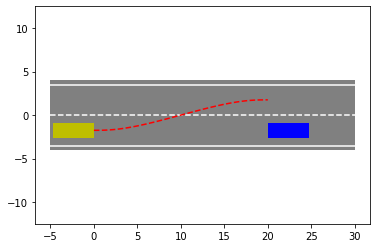

d:\ProgramData\Anaconda3\envs\gobigger\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 27178 (\N{CJK UNIFIED IDEOGRAPH-6A2A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ProgramData\Anaconda3\envs\gobigger\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21521 (\N{CJK UNIFIED IDEOGRAPH-5411}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ProgramData\Anaconda3\envs\gobigger\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 36895 (\N{CJK UNIFIED IDEOGRAPH-901F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\ProgramData\Anaconda3\envs\gobigger\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


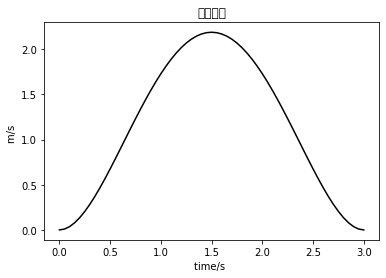

d:\ProgramData\Anaconda3\envs\gobigger\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 32437 (\N{CJK UNIFIED IDEOGRAPH-7EB5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


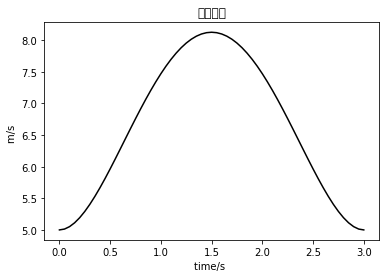

In [134]:
## 画场景示意图
plt.figure(1)
# 画灰色路面图
GreyZone = np.array([[- 5,- d - 0.5],[- 5,d + 0.5],[len_line,d + 0.5],[len_line,- d - 0.5]])
plt.fill(GreyZone[:,0],GreyZone[:,1],'gray')

# 画小车
plt.fill(np.array([state_t1[0],state_t1[0],state_t1[0] + L,state_t1[0] + L]),np.array([- d / 2 - W / 2,- d / 2 + W / 2,- d / 2 + W / 2,- d / 2 - W / 2]),'b')
plt.fill(np.array([state_t0[0],state_t0[0],state_t0[0] - L,state_t0[0] - L]),np.array([- d / 2 - W / 2,- d / 2 + W / 2,- d / 2 + W / 2,- d / 2 - W / 2]),'y')
# 画分界线
plt.plot(np.array([- 5,len_line]),np.array([0,0]),'w--')

plt.plot(np.array([- 5,len_line]),np.array([d,d]),'w')

plt.plot(np.array([- 5,len_line]),np.array([- d,- d]),'w')

# 设置坐标轴显示范围
plt.axis('equal')




# 画换道轨迹
plt.plot(path[:,0],path[:,1],'r--')
plt.savefig("场景示意图.png")

## 分析速度

# 横向速度
plt.figure(2)
plt.title("横向速度")
plt.plot(t,path[:,3],'k')
plt.xlabel('time/s ')
plt.ylabel('m/s ')
plt.savefig("横向速度.png")

# 纵向速度
plt.figure(3)
plt.title("纵向速度")
plt.plot(t,path[:,2],'k')
plt.xlabel('time/s ')
plt.ylabel('m/s ')

plt.savefig("纵向速度.png")
plt.show()